# Bibliotecas Utilizadas 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

# Tratamento dos Dados Brutos

### Glossário das variáveis do dataset

    customerID                   Identificação do imóvel no portal;
    source                       Fonte de Coleta do dados;
    types_unit                   Tipo de imóvel;
    types_usage                  Tipo de utilização do imóvel;
    address_city                 Cidade de localização do imóvel;
    address_location_lon         Longitude (longitude, decimal);
    address_location_lat         Latitude (latitude, decimal);
    address_zone                 Zona de subdivisão da cidade;
    address_neighborhood         Nome do Bairro do imóvel (bairro);
    prices_price                 Preço do Imóvel (preco, em BRL)
    prices_tax_iptu              Valor cobrado do IPTU;
    prices_tax_condo             Valor cobrado da taxa de condomínio;
    features_bedrooms            Número de dormitórios (quartos);
    features_bathrooms           Número de banheiros;
    features_suites              Número de suítes (suítes);
    features_parkingSpaces       Número de vagas de garagem (vagas);
    features_usableAreas         Área útil do apartamento;
    features_totalAreas          Área total do apartamento;
    features_floors              Tipo de piso;
    features_unitsOnTheFloor     Andar do apartamento;
    features_unitFloor           Apartamento no Térreo.

In [2]:
# leitura dos dados
dados = pd.read_json('dados/imoveis.json')

In [3]:
# visualização dos dados tipo json
dados.head(2) #temos duas colunas para trabalhar

,ident,listing
0,"{'customerID': '775564-BOJSMVON', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Residen..."
1,"{'customerID': '660895-AUENKNYY', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."


### Conversão do DataFrame

In [4]:
# conversão coluna 1
dados_lista1=pd.json_normalize(dados.ident)

In [5]:
dados_lista1.head(3)

,customerID,source
0,775564-BOJSMVON,Website
1,660895-AUENKNYY,Website
2,751522-JESYFEQL,Website


In [6]:
# conversão coluna 2
dados_lista2=pd.json_normalize(dados.listing,sep='_')

In [7]:
dados_lista2.head(3)

,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,prices_tax_iptu,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,0,150,0,0,0,1,62,62,0,0,0
1,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,0,120,2,1,0,1,44,0,0,0,0
2,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,0,100,0,0,0,0,132,132,0,0,0


In [8]:
# juntando os dois dataframes
dados_imoveis = pd.concat([dados_lista1,dados_lista2],axis=1)

In [9]:
dados_imoveis.head(3)

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,...,150,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,...,120,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,...,100,0,0,0,0,132,132,0,0,0


### Mapeamento do conjunto de dados

In [10]:
# dimensoes do dataset
dados_imoveis.shape

(73615, 21)

In [11]:
# visualizando todas as colunas
pd.set_option('display.max_columns',21)
dados_imoveis.head(4)

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,prices_tax_iptu,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,0,150,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,0,120,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,0,100,0,0,0,0,132,132,0,0,0
3,714052-GAAEWYKS,Website,Outros,Comercial,Rio de Janeiro,-43.330818,-22.881977,Zona Norte,Cascadura,45000,346,468,0,1,0,0,32,32,0,0,3


In [12]:
# tipos de variáveis presentes em cada coluna
dados_imoveis.dtypes

customerID                   object
source                       object
types_unit                   object
types_usage                  object
address_city                 object
address_location_lon        float64
address_location_lat        float64
address_zone                 object
address_neighborhood         object
prices_price                 object
prices_tax_iptu              object
prices_tax_condo             object
features_bedrooms             int64
features_bathrooms            int64
features_suites               int64
features_parkingSpaces        int64
features_usableAreas         object
features_totalAreas          object
features_floors               int64
features_unitsOnTheFloor      int64
features_unitFloor            int64
dtype: object

In [13]:
# nome das colunas
dados_imoveis.columns

Index(['customerID', 'source', 'types_unit', 'types_usage', 'address_city',
       'address_location_lon', 'address_location_lat', 'address_zone',
       'address_neighborhood', 'prices_price', 'prices_tax_iptu',
       'prices_tax_condo', 'features_bedrooms', 'features_bathrooms',
       'features_suites', 'features_parkingSpaces', 'features_usableAreas',
       'features_totalAreas', 'features_floors', 'features_unitsOnTheFloor',
       'features_unitFloor'],
      dtype='object')

In [14]:
# verificando valores únicos de cidade
dados_imoveis.address_city.unique()

array(['Rio de Janeiro', 'Cachoeirinha', 'Queimados',
       'São João de Meriti', 'São Gonçalo', 'Armação dos Búzios'],
      dtype=object)

### Dados de cada coluna do DataFrame

In [15]:
# contando a quantidade de valor em cada coluna
for coluna in dados_imoveis.columns:
    print('===='*30)
    print(dados_imoveis[coluna].value_counts())
    

775564-BOJSMVON    1
917809-TRNXMOHE    1
125760-XEXDELYV    1
294183-VCUBOXCU    1
465524-CFDRZTHS    1
                  ..
200525-LDRZXCVM    1
938284-QWFBFUXB    1
882696-YVZSJYMI    1
566032-WFPGBXHL    1
610503-VULDJJZZ    1
Name: customerID, Length: 73615, dtype: int64
Website    73615
Name: source, dtype: int64
Apartamento    59106
Casa            9389
Outros          5120
Name: types_unit, dtype: int64
Residencial    69596
Comercial       4019
Name: types_usage, dtype: int64
Rio de Janeiro        73607
Queimados                 3
São Gonçalo               2
Cachoeirinha              1
São João de Meriti        1
Armação dos Búzios        1
Name: address_city, dtype: int64
-43.365895    399
-43.462590    278
-43.333066    236
-43.383834    232
-43.516473    218
             ... 
-43.231882      1
-43.236952      1
-43.240152      1
-43.185712      1
-43.250934      1
Name: address_location_lon, Length: 25753, dtype: int64
-23.000371    399
-23.017479    278
-22.937463    236
-2

> <i><b>Com a análise das variáveis presentes em cada coluna, notamos que temos valores faltantes na variável address_zone. Também temos dados que contêm somente 1, onde deveria ter um valor para representar tal variável. Logo, precisamos compreender melhor o dataset.</i></b>

### Limpeza dos dados 

> Nossa análise consistirá somente na predição de valores para venda de imóveis residenciais. Por isso, vamos filtrar esse tipo de móveis.

In [16]:
# criando um filtro para selecionar somente imoveis residenciais na cidade do Rio de Janeiro
filtro = (dados_imoveis['types_usage']=='Residencial') & (dados_imoveis['address_city']=='Rio de Janeiro')

In [17]:
# fazendo a selecao desse filtro e gerando um novo dataset
dados_residencial = dados_imoveis[filtro]
dados_residencial.head()

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,prices_tax_iptu,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,0,150,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,0,120,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,0,100,0,0,0,0,132,132,0,0,0
4,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,120,400,3,2,1,1,60,0,3,4,2
5,526755-OBLTYTEN,Website,Outros,Residencial,Rio de Janeiro,-43.571183,-22.966059,Zona Oeste,Guaratiba,50000,None,0,0,0,0,0,200,200,0,0,0


In [18]:
# dimensao 
dados_residencial.shape[0]

69588

In [19]:
# informações sobre os valores do dataset
dados_residencial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69588 entries, 0 to 73614
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                69588 non-null  object 
 1   source                    69588 non-null  object 
 2   types_unit                69588 non-null  object 
 3   types_usage               69588 non-null  object 
 4   address_city              69588 non-null  object 
 5   address_location_lon      69449 non-null  float64
 6   address_location_lat      69449 non-null  float64
 7   address_zone              69588 non-null  object 
 8   address_neighborhood      69588 non-null  object 
 9   prices_price              69588 non-null  object 
 10  prices_tax_iptu           60863 non-null  object 
 11  prices_tax_condo          63527 non-null  object 
 12  features_bedrooms         69588 non-null  int64  
 13  features_bathrooms        69588 non-null  int64  
 14  featur

> <i><b> Aqui já notamos que o index está indo de 0-73614, mas o tamanho desse dataset é de 69588, logo vamos redefinir o index. Outro ponto é que a variável "prices_tax_iptu" e "prices_tax_condo" estão como objects e deveriam ser numéricas. Notamos também valores faltantes nas variáveis address_location_lon, address_location_lat, prices_tax_iptu e prices_tax_condo. </i></b>

### Corrigindo valores faltantes, index e tipos de variáveis de colunas do dataset

In [20]:
# resetando o indice para valores crescentes e já substituindo no dataset
dados_residencial.reset_index(drop=True,inplace=True)
dados_residencial.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69588 entries, 0 to 69587
Columns: 21 entries, customerID to features_unitFloor
dtypes: float64(2), int64(7), object(12)
memory usage: 11.1+ MB


In [21]:
dados_residencial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69588 entries, 0 to 69587
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                69588 non-null  object 
 1   source                    69588 non-null  object 
 2   types_unit                69588 non-null  object 
 3   types_usage               69588 non-null  object 
 4   address_city              69588 non-null  object 
 5   address_location_lon      69449 non-null  float64
 6   address_location_lat      69449 non-null  float64
 7   address_zone              69588 non-null  object 
 8   address_neighborhood      69588 non-null  object 
 9   prices_price              69588 non-null  object 
 10  prices_tax_iptu           60863 non-null  object 
 11  prices_tax_condo          63527 non-null  object 
 12  features_bedrooms         69588 non-null  int64  
 13  features_bathrooms        69588 non-null  int64  
 14  featur

In [22]:
# convertendo os numeros que são float 64 e int 64
dados_residencial = dados_residencial.astype({'prices_price':'float64',
                                              'prices_tax_iptu':'float64',
                                             'prices_tax_condo':'float64',
                                             'features_usableAreas':'int64',
                                             'features_totalAreas':'int64'})

In [23]:
dados_residencial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69588 entries, 0 to 69587
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                69588 non-null  object 
 1   source                    69588 non-null  object 
 2   types_unit                69588 non-null  object 
 3   types_usage               69588 non-null  object 
 4   address_city              69588 non-null  object 
 5   address_location_lon      69449 non-null  float64
 6   address_location_lat      69449 non-null  float64
 7   address_zone              69588 non-null  object 
 8   address_neighborhood      69588 non-null  object 
 9   prices_price              69588 non-null  float64
 10  prices_tax_iptu           60863 non-null  float64
 11  prices_tax_condo          63527 non-null  float64
 12  features_bedrooms         69588 non-null  int64  
 13  features_bathrooms        69588 non-null  int64  
 14  featur

In [24]:
# substituindo os valores faltantes da coluna address_zone para valores NaN
dados_residencial.address_zone = dados_residencial.address_zone.replace('',np.nan)
dados_residencial.address_zone.isna().sum()

149

In [25]:
dados_residencial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69588 entries, 0 to 69587
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                69588 non-null  object 
 1   source                    69588 non-null  object 
 2   types_unit                69588 non-null  object 
 3   types_usage               69588 non-null  object 
 4   address_city              69588 non-null  object 
 5   address_location_lon      69449 non-null  float64
 6   address_location_lat      69449 non-null  float64
 7   address_zone              69439 non-null  object 
 8   address_neighborhood      69588 non-null  object 
 9   prices_price              69588 non-null  float64
 10  prices_tax_iptu           60863 non-null  float64
 11  prices_tax_condo          63527 non-null  float64
 12  features_bedrooms         69588 non-null  int64  
 13  features_bathrooms        69588 non-null  int64  
 14  featur

In [26]:
# mapeando locais que tem bairro, mas não tem "zona", para que possamos complementar sua zona. 
# criando um dicionario para mapear valores que não são nulos na coluna "address_zone" e removendo os duplicados através do filtro "adress_neighborhood"
dici = dados_imoveis[~dados_imoveis['address_zone'].isna()].drop_duplicates(subset=['address_neighborhood']).to_dict('records')

In [27]:
dici

[{'customerID': '775564-BOJSMVON',
  'source': 'Website',
  'types_unit': 'Outros',
  'types_usage': 'Residencial',
  'address_city': 'Rio de Janeiro',
  'address_location_lon': -43.413557,
  'address_location_lat': -22.909429,
  'address_zone': 'Zona Oeste',
  'address_neighborhood': 'Taquara',
  'prices_price': '45000',
  'prices_tax_iptu': '0',
  'prices_tax_condo': '150',
  'features_bedrooms': 0,
  'features_bathrooms': 0,
  'features_suites': 0,
  'features_parkingSpaces': 1,
  'features_usableAreas': '62',
  'features_totalAreas': '62',
  'features_floors': 0,
  'features_unitsOnTheFloor': 0,
  'features_unitFloor': 0},
 {'customerID': '660895-AUENKNYY',
  'source': 'Website',
  'types_unit': 'Apartamento',
  'types_usage': 'Residencial',
  'address_city': 'Rio de Janeiro',
  'address_location_lon': -43.509141,
  'address_location_lat': -22.869698,
  'address_zone': 'Zona Oeste',
  'address_neighborhood': 'Santíssimo',
  'prices_price': '45000',
  'prices_tax_iptu': '0',
  'pric

In [28]:
# dicionario para mapear qual a zona de bairros
dici_zonas = {dic['address_neighborhood'] : dic['address_zone']for dic in dici}
dici_zonas

{'Taquara': 'Zona Oeste',
 'Santíssimo': 'Zona Oeste',
 'Pedra de Guaratiba': 'Zona Oeste',
 'Cascadura': 'Zona Norte',
 'Recreio dos Bandeirantes': 'Zona Oeste',
 'Guaratiba': 'Zona Oeste',
 'Freguesia (Jacarepaguá)': 'Zona Oeste',
 'Penha': 'Zona Norte',
 'Ricardo de Albuquerque': 'Zona Norte',
 'Jacarezinho': 'Zona Norte',
 'Santa Cruz': 'Zona Oeste',
 'Vargem Grande': 'Zona Oeste',
 'Bangu': 'Zona Oeste',
 'Tanque': 'Zona Oeste',
 'Centro': 'Zona Central',
 'Madureira': 'Zona Norte',
 'Santo Cristo': 'Zona Central',
 'Coelho Neto': 'Zona Norte',
 'Bento Ribeiro': 'Zona Norte',
 'Campo Grande': 'Zona Oeste',
 'Oswaldo Cruz': 'Zona Norte',
 'Camorim': 'Zona Oeste',
 'Sepetiba': 'Zona Oeste',
 'Vigário Geral': 'Zona Norte',
 'Campinho': 'Zona Norte',
 'Cacuia': 'Zona Norte',
 'Realengo': 'Zona Oeste',
 'Jacarepaguá': 'Zona Oeste',
 'Cidade de Deus': 'Zona Oeste',
 'Honório Gurgel': 'Zona Norte',
 'Lins de Vasconcelos': 'Zona Norte',
 'Cosmos': 'Zona Oeste',
 'Tomás Coelho': 'Zona Nort

In [29]:
# inserindo dados na coluna "zona" de acordo com o bairro
for bairro,zona in dici_zonas.items(): dados_residencial.loc[dados_residencial['address_neighborhood']==bairro,'address_zone']=zona

In [30]:
# verificando se ainda há dados faltantes
dados_residencial.address_zone.isnull().sum()

0

In [31]:
dados_residencial.isnull().sum()

customerID                     0
source                         0
types_unit                     0
types_usage                    0
address_city                   0
address_location_lon         139
address_location_lat         139
address_zone                   0
address_neighborhood           0
prices_price                   0
prices_tax_iptu             8725
prices_tax_condo            6061
features_bedrooms              0
features_bathrooms             0
features_suites                0
features_parkingSpaces         0
features_usableAreas           0
features_totalAreas            0
features_floors                0
features_unitsOnTheFloor       0
features_unitFloor             0
dtype: int64

In [32]:
# modificando o valores faltantes da prices_tax_iptu
dados_residencial.prices_tax_iptu.fillna(0,inplace=True)
dados_residencial.prices_tax_condo.fillna(0,inplace=True)
dados_residencial.isnull().sum()

customerID                    0
source                        0
types_unit                    0
types_usage                   0
address_city                  0
address_location_lon        139
address_location_lat        139
address_zone                  0
address_neighborhood          0
prices_price                  0
prices_tax_iptu               0
prices_tax_condo              0
features_bedrooms             0
features_bathrooms            0
features_suites               0
features_parkingSpaces        0
features_usableAreas          0
features_totalAreas           0
features_floors               0
features_unitsOnTheFloor      0
features_unitFloor            0
dtype: int64

In [33]:
dados_residencial.columns

Index(['customerID', 'source', 'types_unit', 'types_usage', 'address_city',
       'address_location_lon', 'address_location_lat', 'address_zone',
       'address_neighborhood', 'prices_price', 'prices_tax_iptu',
       'prices_tax_condo', 'features_bedrooms', 'features_bathrooms',
       'features_suites', 'features_parkingSpaces', 'features_usableAreas',
       'features_totalAreas', 'features_floors', 'features_unitsOnTheFloor',
       'features_unitFloor'],
      dtype='object')

In [34]:
dados_residencial.head(3)

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,prices_tax_iptu,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000.0,0.0,150.0,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000.0,0.0,120.0,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000.0,0.0,100.0,0,0,0,0,132,132,0,0,0


In [35]:
# removendo colunas
dados_residencial.drop(['customerID','address_city','source','types_usage','address_location_lon','address_location_lat','address_neighborhood'],axis=1,inplace=True)

In [36]:
# verificando dataset
dados_residencial.head(2)

,types_unit,address_zone,prices_price,prices_tax_iptu,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,Outros,Zona Oeste,45000.0,0.0,150.0,0,0,0,1,62,62,0,0,0
1,Apartamento,Zona Oeste,45000.0,0.0,120.0,2,1,0,1,44,0,0,0,0


In [37]:
# traduzindo o dataset para variáveis em português
renomear = {'types_unit':'tipo_unidade',
            'address_zone':'zona',
            'prices_price':'preco', 
            'prices_tax_iptu':'iptu',
           'prices_tax_condo':'condominio', 
            'features_bedrooms':'quartos', 
            'features_bathrooms':'banheiros',
           'features_suites':'suites', 
            'features_parkingSpaces':'vagas',
            'features_usableAreas':'area_util',
           'features_totalAreas':'area_total', 
            'features_floors':'andares', 
            'features_unitsOnTheFloor':'unidade_por_andar',
           'features_unitFloor':'carac_andar'}

dados_residencial.rename(renomear,axis=1,inplace=True)
dados_residencial.head(3)

,tipo_unidade,zona,preco,iptu,condominio,quartos,banheiros,suites,vagas,area_util,area_total,andares,unidade_por_andar,carac_andar
0,Outros,Zona Oeste,45000.0,0.0,150.0,0,0,0,1,62,62,0,0,0
1,Apartamento,Zona Oeste,45000.0,0.0,120.0,2,1,0,1,44,0,0,0,0
2,Outros,Zona Oeste,50000.0,0.0,100.0,0,0,0,0,132,132,0,0,0


# Analisando correlação entre as variáveis


In [38]:
correlacao = dados_residencial.corr()

In [39]:
correlacao

,preco,iptu,condominio,quartos,banheiros,suites,vagas,area_util,area_total,andares,unidade_por_andar,carac_andar
preco,1.000000,0.029751,0.047704,0.530474,0.571725,0.588738,0.423186,0.692502,-0.000619,-0.061910,-0.133700,-0.000143
iptu,0.029751,1.000000,0.226213,0.013625,0.015086,0.019101,0.009720,0.014654,-0.000164,0.006704,0.005044,0.001204
condominio,0.047704,0.226213,1.000000,0.018460,0.020009,0.023479,0.018010,0.019712,-0.000313,0.013821,-0.000528,0.003072
quartos,0.530474,0.013625,0.018460,1.000000,0.665958,0.600596,0.467391,0.563545,-0.000532,-0.082025,-0.130611,-0.007146
banheiros,0.571725,0.015086,0.020009,0.665958,1.000000,0.752495,0.487624,0.597793,0.000041,-0.044552,-0.107347,0.007599
suites,0.588738,0.019101,0.023479,0.600596,0.752495,1.000000,0.484850,0.577344,0.003971,-0.047576,-0.091408,0.005300
vagas,0.423186,0.009720,0.018010,0.467391,0.487624,0.484850,1.000000,0.483709,-0.000062,-0.048310,-0.074348,0.003788
area_util,0.692502,0.014654,0.019712,0.563545,0.597793,0.577344,0.483709,1.000000,-0.000214,-0.103729,-0.144041,-0.012715
area_total,-0.000619,-0.000164,-0.000313,-0.000532,0.000041,0.003971,-0.000062,-0.000214,1.000000,0.014677,0.003975,0.002329
andares,-0.061910,0.006704,0.013821,-0.082025,-0.044552,-0.047576,-0.048310,-0.103729,0.014677,1.000000,0.737802,0.121067


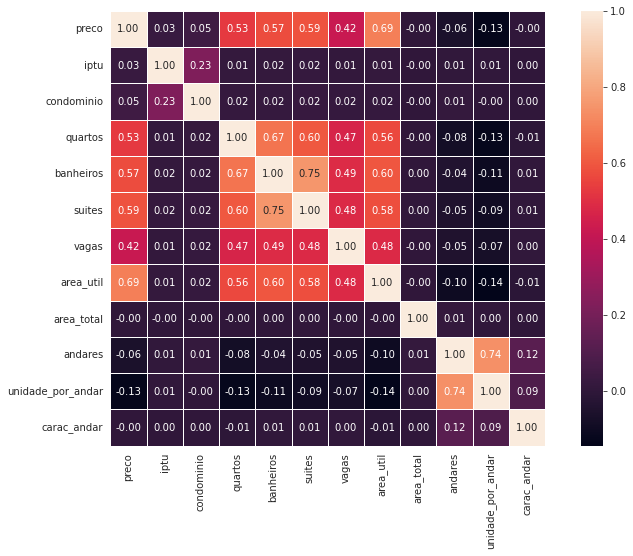

In [40]:
with sns.axes_style("white"):
    f,ax = plt.subplots(figsize=(13,8))
    ax = sns.heatmap(correlacao,square=True,fmt='.2f',annot=True,linewidth=.5)

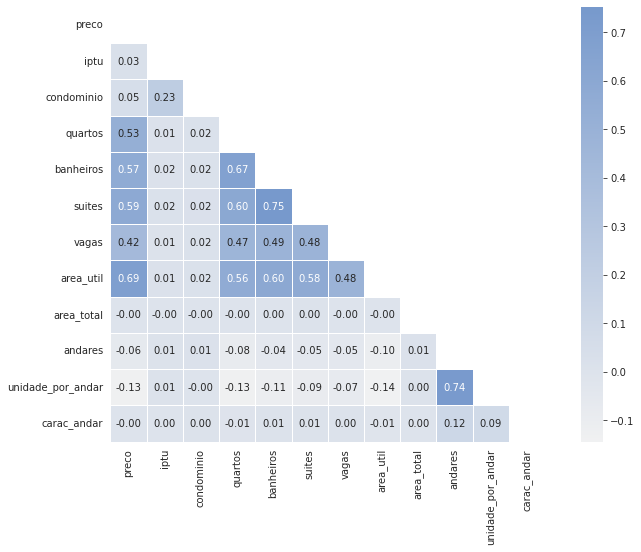

In [41]:
# criando um filtro para visualizar a matriz de correlação
cores = sns.light_palette("#79C",as_cmap=True)
mask = np.zeros_like(correlacao)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f,ax = plt.subplots(figsize=(13,8))
    ax = sns.heatmap(correlacao,mask=mask,cmap=cores,square=True,fmt='.2f',annot=True,linewidth=.5)

> <b><i>Notamos que as variáveis possuem multicorrelação. Para analisarmos um pouco mais sobre isso, vamos checar a distribuição das variáveis. </b></i>

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


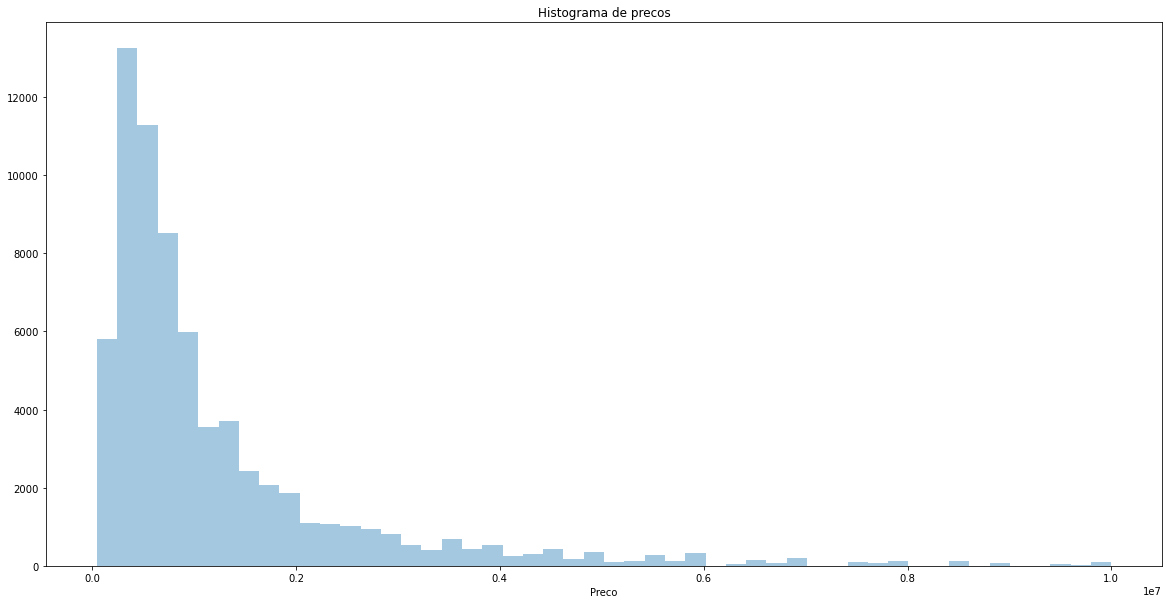

In [42]:
ax = sns.distplot(dados_residencial.preco,kde=False)
ax.figure.set_size_inches(20,10)
ax.set_title('Histograma de precos')
ax.set_xlabel('Preco')
ax = ax

> <i><b>Com esse gráfico notamos que nosso dataset não possui uma boa distribuição de valores para prever todas as faixas de valores. Para corrigirmos isso vou realizar uma transformação dessa curva atráves da transformação logaritmica</i></b>

### Normalização dos dados

In [43]:
# normalizando os dados através da transformação log1
transformer = FunctionTransformer(np.log1p, validate=True)

In [44]:
# criando vetor com dados transformados
dados_transformados = transformer.transform(dados_residencial.select_dtypes(exclude=['object'])) #selecionando somente dados numéricos no dataset
dados_transformados #visualizando

array([[10.71443999,  0.        ,  5.01727984, ...,  0.        ,
         0.        ,  0.        ],
       [10.71443999,  0.        ,  4.79579055, ...,  0.        ,
         0.        ,  0.        ],
       [10.81979828,  0.        ,  4.61512052, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [16.11809575,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [16.11809575, 10.46313191,  7.7836406 , ...,  0.        ,
         0.        ,  1.38629436],
       [16.11809575, 10.16589028,  7.49609735, ...,  1.38629436,
         0.69314718,  0.        ]])

In [45]:
# selecionando as colunas transformadas 
colunas_dados_transformados = dados_residencial.select_dtypes(exclude=['object']).columns # pegando só colunas que são numéricas
print(colunas_dados_transformados) #visualizando

Index(['preco', 'iptu', 'condominio', 'quartos', 'banheiros', 'suites',
       'vagas', 'area_util', 'area_total', 'andares', 'unidade_por_andar',
       'carac_andar'],
      dtype='object')


In [46]:
# criando dataset contendo somente valores numéricos transformados
df_log = pd.DataFrame(dados_transformados,columns=colunas_dados_transformados)

# verificando as dimensoes
print('A quantidade de colunas do DataFrame numérico é {}'.format(df_log.shape[1]))
print('A quantidade de dados nulos neste dataset é {}'.format(df_log.isnull().sum().sum()))

df_log.head(3) #visualizando

A quantidade de colunas do DataFrame numérico é 12
A quantidade de dados nulos neste dataset é 0


,preco,iptu,condominio,quartos,banheiros,suites,vagas,area_util,area_total,andares,unidade_por_andar,carac_andar
0,10.714440,0.0,5.017280,0.000000,0.000000,0.0,0.693147,4.143135,4.143135,0.0,0.0,0.0
1,10.714440,0.0,4.795791,1.098612,0.693147,0.0,0.693147,3.806662,0.000000,0.0,0.0,0.0
2,10.819798,0.0,4.615121,0.000000,0.000000,0.0,0.000000,4.890349,4.890349,0.0,0.0,0.0


In [47]:
# fazendo selecao de colunas que contem somente dados qualitativos
dados_residencial_cat = dados_residencial.select_dtypes(include=['object'])

print('A quantidade de colunas do DataFrame qualitativo é {}'.format(dados_residencial_cat.shape[1]))
print('A quantidade de dados nulos neste dataset é {}'.format(dados_residencial_cat.isnull().sum().sum()))
dados_residencial_cat

A quantidade de colunas do DataFrame qualitativo é 2
A quantidade de dados nulos neste dataset é 0


,tipo_unidade,zona
0,Outros,Zona Oeste
1,Apartamento,Zona Oeste
2,Outros,Zona Oeste
3,Apartamento,Zona Oeste
4,Outros,Zona Oeste
...,...,...
69583,Casa,Zona Oeste
69584,Casa,Zona Oeste
69585,Apartamento,Zona Sul
69586,Casa,Zona Oeste


In [48]:
# juntando os dois DataFrames criados anteriormente
df_transformado = pd.concat([dados_residencial_cat,df_log],axis=1)

print('O DataFrame Normalizado é {}'.format(df_transformado.shape))
print('A quantidade de de valores nulos nesse DataFrame é {}'.format(df_transformado.isnull().sum().sum()))
df_transformado

O DataFrame Normalizado é (69588, 14)
A quantidade de de valores nulos nesse DataFrame é 0


,tipo_unidade,zona,preco,iptu,condominio,quartos,banheiros,suites,vagas,area_util,area_total,andares,unidade_por_andar,carac_andar
0,Outros,Zona Oeste,10.714440,0.000000,5.017280,0.000000,0.000000,0.000000,0.693147,4.143135,4.143135,0.000000,0.000000,0.000000
1,Apartamento,Zona Oeste,10.714440,0.000000,4.795791,1.098612,0.693147,0.000000,0.693147,3.806662,0.000000,0.000000,0.000000,0.000000
2,Outros,Zona Oeste,10.819798,0.000000,4.615121,0.000000,0.000000,0.000000,0.000000,4.890349,4.890349,0.000000,0.000000,0.000000
3,Apartamento,Zona Oeste,10.819798,4.795791,5.993961,1.386294,1.098612,0.693147,0.693147,4.110874,0.000000,1.386294,1.609438,1.098612
4,Outros,Zona Oeste,10.819798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.303305,5.303305,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69583,Casa,Zona Oeste,16.118096,7.972811,7.762596,1.791759,2.397895,0.693147,1.609438,6.932448,6.932448,0.000000,0.000000,0.000000
69584,Casa,Zona Oeste,16.118096,9.615872,8.006701,1.791759,2.079442,1.791759,1.945910,6.621406,7.131699,0.000000,0.000000,0.000000
69585,Apartamento,Zona Sul,16.118096,0.000000,0.000000,1.609438,1.791759,1.609438,1.386294,5.796058,5.796058,0.000000,0.000000,0.000000
69586,Casa,Zona Oeste,16.118096,10.463132,7.783641,1.791759,2.397895,1.791759,1.609438,6.932448,6.932448,0.000000,0.000000,1.386294


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


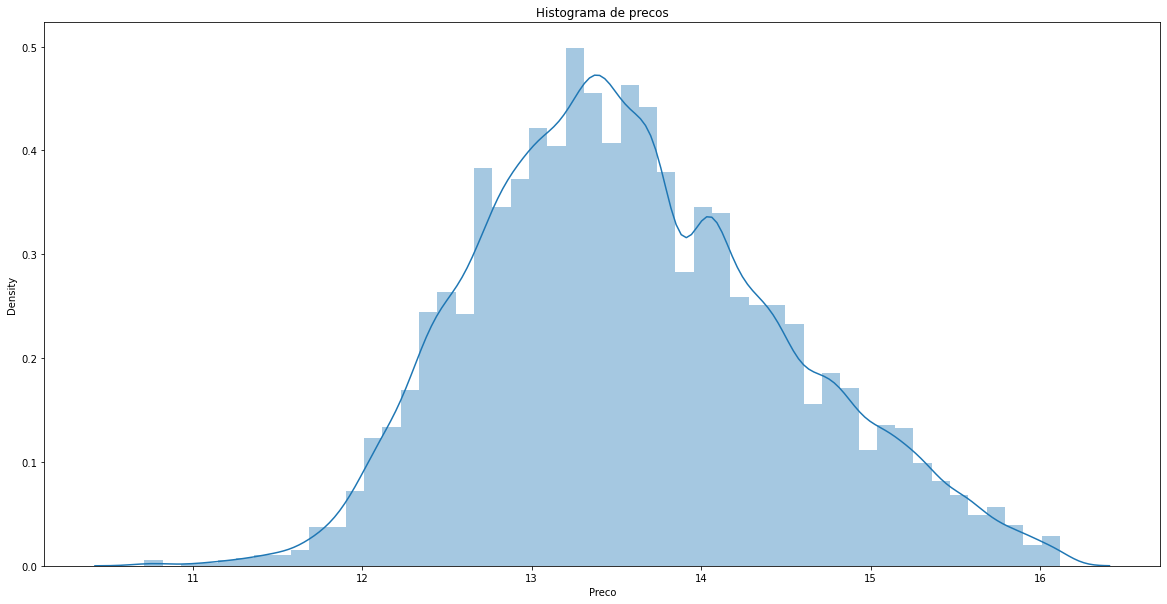

In [49]:
# conferindo a distribuição dos dados normalizados
ax = sns.distplot(df_transformado.preco,kde=True)
ax.figure.set_size_inches(20,10)
ax.set_title('Histograma de precos')
ax.set_xlabel('Preco')
ax = ax

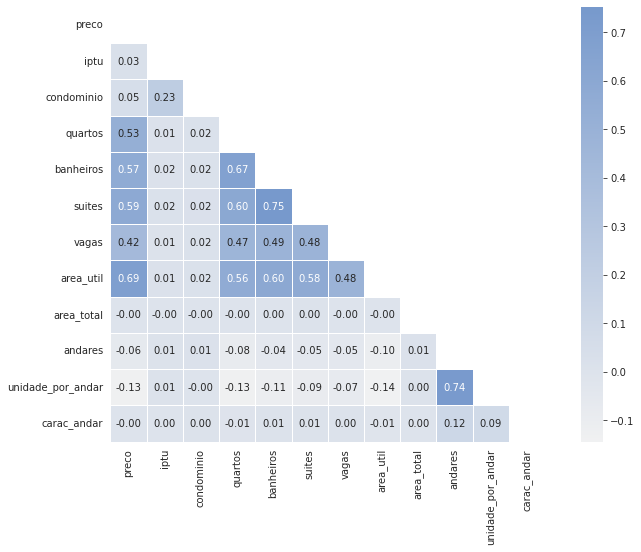

In [50]:
# nova matriz de correlação
correlacao_transformado = df_transformado.corr()
cores = sns.light_palette("#79C",as_cmap=True)
mask = np.zeros_like(correlacao)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f,ax = plt.subplots(figsize=(13,8))
    ax = sns.heatmap(correlacao,mask=mask,cmap=cores,square=True,fmt='.2f',annot=True,linewidth=.5)

In [51]:
# informacoes sobre as variaveis do DataFrame
df_transformado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69588 entries, 0 to 69587
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tipo_unidade       69588 non-null  object 
 1   zona               69588 non-null  object 
 2   preco              69588 non-null  float64
 3   iptu               69588 non-null  float64
 4   condominio         69588 non-null  float64
 5   quartos            69588 non-null  float64
 6   banheiros          69588 non-null  float64
 7   suites             69588 non-null  float64
 8   vagas              69588 non-null  float64
 9   area_util          69588 non-null  float64
 10  area_total         69588 non-null  float64
 11  andares            69588 non-null  float64
 12  unidade_por_andar  69588 non-null  float64
 13  carac_andar        69588 non-null  float64
dtypes: float64(12), object(2)
memory usage: 7.4+ MB


In [52]:
# selecionando os valores categoricos para criar colunas dummies
df_transformado.select_dtypes(include=['object']).columns

Index(['tipo_unidade', 'zona'], dtype='object')

### O que é uma Variável Dummie

> Variáveis dummy são variáveis binárias (0 ou 1) criadas para representar uma variável com duas ou mais categorias.

In [53]:
df_dummies = pd.get_dummies(df_transformado.select_dtypes(include=['object']))
df_dummies.head(2)

,tipo_unidade_Apartamento,tipo_unidade_Casa,tipo_unidade_Outros,zona_Zona Central,zona_Zona Norte,zona_Zona Oeste,zona_Zona Sul
0,0,0,1,0,0,1,0
1,1,0,0,0,0,1,0


In [54]:
# selecionando os valores numéricos
df_transformado = df_transformado.select_dtypes(exclude=['object'])
df_transformado

,preco,iptu,condominio,quartos,banheiros,suites,vagas,area_util,area_total,andares,unidade_por_andar,carac_andar
0,10.714440,0.000000,5.017280,0.000000,0.000000,0.000000,0.693147,4.143135,4.143135,0.000000,0.000000,0.000000
1,10.714440,0.000000,4.795791,1.098612,0.693147,0.000000,0.693147,3.806662,0.000000,0.000000,0.000000,0.000000
2,10.819798,0.000000,4.615121,0.000000,0.000000,0.000000,0.000000,4.890349,4.890349,0.000000,0.000000,0.000000
3,10.819798,4.795791,5.993961,1.386294,1.098612,0.693147,0.693147,4.110874,0.000000,1.386294,1.609438,1.098612
4,10.819798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.303305,5.303305,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
69583,16.118096,7.972811,7.762596,1.791759,2.397895,0.693147,1.609438,6.932448,6.932448,0.000000,0.000000,0.000000
69584,16.118096,9.615872,8.006701,1.791759,2.079442,1.791759,1.945910,6.621406,7.131699,0.000000,0.000000,0.000000
69585,16.118096,0.000000,0.000000,1.609438,1.791759,1.609438,1.386294,5.796058,5.796058,0.000000,0.000000,0.000000
69586,16.118096,10.463132,7.783641,1.791759,2.397895,1.791759,1.609438,6.932448,6.932448,0.000000,0.000000,1.386294


In [55]:
# juntando o Dataframe numérico + Dataframe Dummie
dados_final = pd.concat([df_transformado,df_dummies],axis=1)
dados_final.head(3)

,preco,iptu,condominio,quartos,banheiros,suites,vagas,area_util,area_total,andares,unidade_por_andar,carac_andar,tipo_unidade_Apartamento,tipo_unidade_Casa,tipo_unidade_Outros,zona_Zona Central,zona_Zona Norte,zona_Zona Oeste,zona_Zona Sul
0,10.714440,0.0,5.017280,0.000000,0.000000,0.0,0.693147,4.143135,4.143135,0.0,0.0,0.0,0,0,1,0,0,1,0
1,10.714440,0.0,4.795791,1.098612,0.693147,0.0,0.693147,3.806662,0.000000,0.0,0.0,0.0,1,0,0,0,0,1,0
2,10.819798,0.0,4.615121,0.000000,0.000000,0.0,0.000000,4.890349,4.890349,0.0,0.0,0.0,0,0,1,0,0,1,0


# Conjunto de Teste e Treino dos Modelos 

In [56]:
X = dados_final.drop(['preco'],axis=1)

y = dados_final['preco']

SEED=42
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=SEED)

> Na análise feita aqui utilizou 3 solvers existentes na biblioteca do Scikit Learn, sendo estes a Regressão Linear, Decision Tree e Random Forest. As métricas de R², MSE,e MSE² foram utilizados para avaliação dos estimadores desenvolvidos. 

# Regressão Linear com Linear Regression

In [57]:
modelo_linear = LinearRegression()
modelo_linear.fit(X_train,y_train)

LinearRegression()

In [58]:
y_linear = modelo_linear.predict(X_test)
y_linear

array([13.26043985, 12.45310795, 12.90835287, ..., 13.12986748,
       12.41740724, 14.49822952])

In [59]:
np.expm1(y_linear) # lembrando que os dados foram normalizados pela log1, logo para sabermos o real valor é preciso fazer a operação inversa

array([ 574030.67348829,  256043.86237473,  403668.95125928, ...,
        503765.1627642 ,  247064.12263794, 1979250.92461517])

### Métricas de avaliação do modelo

In [60]:
R2_linear = r2_score(y_test,y_linear).round(4)
EQM_linear = mean_squared_error(y_test,y_linear).round(4) #mais proximo de zero, melhor
REQM_linear = np.sqrt(EQM_linear).round(4) #calcula a distancia de um ponto em relação a linha, logo verifica a concentração dos dados proximo a linha ajustada

print('O valor de R² para esse modelo linear é {}'.format(R2_linear))
print('O valor de EQM para esse modelo linear é {}'.format(EQM_linear))
print('O valor de REQM para esse modelo linear é {}'.format(REQM_linear))

O valor de R² para esse modelo linear é 0.7868
O valor de EQM para esse modelo linear é 0.1745
O valor de REQM para esse modelo linear é 0.4177


# Regressão Linear com Decision Tree

In [61]:
modelo_dt = DecisionTreeRegressor(random_state=SEED, max_depth=6)

In [62]:
modelo_dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=6, random_state=42)

In [63]:
y_dt = modelo_dt.predict(X_test)

### Métricas de avaliação do modelo

In [64]:
R2_dt = r2_score(y_test,y_dt).round(6)
EQM_dt = mean_squared_error(y_test,y_dt).round(4) #mais proximo de zero, melhor
REQM_dt = np.sqrt(EQM_dt).round(4) #calcula a distancia de um ponto em relação a linha, logo verifica a concentração dos dados proximo a linha ajustada

print('O valor de R² para esse modelo DT é {}'.format((R2_dt.round(4))))
print('O valor de EQM para esse modelo DT é {}'.format(EQM_dt))
print('O valor de REQM para esse modelo DT é {}'.format(REQM_dt))

O valor de R² para esse modelo DT é 0.8062
O valor de EQM para esse modelo DT é 0.1586
O valor de REQM para esse modelo DT é 0.3982


# Regressão Linear com Random Forest

In [65]:
modelo_rf = RandomForestRegressor(n_estimators=10, max_depth=5)

In [66]:
modelo_rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, n_estimators=10)

In [67]:
y_rf = modelo_rf.predict(X_test)

### Métricas de avaliação do modelo

In [68]:
R2_rf = r2_score(y_test,y_rf).round(6)
EQM_rf = mean_squared_error(y_test,y_rf).round(4) #mais proximo de zero, melhor
REQM_rf = np.sqrt(EQM_rf).round(4) #calcula a distancia de um ponto em relação a linha, logo verifica a concentração dos dados proximo a linha ajustada

print('O valor de R² para esse modelo RF é {}'.format((R2_rf.round(4))))
print('O valor de EQM para esse modelo RF é {}'.format(EQM_rf))
print('O valor de REQM para esse modelo RF é {}'.format(REQM_rf))

O valor de R² para esse modelo RF é 0.8018
O valor de EQM para esse modelo RF é 0.1623
O valor de REQM para esse modelo RF é 0.4029


# Criando Tabela para Comparar Estimadores

In [69]:
dados_analises = [[R2_linear,EQM_linear,REQM_linear],[R2_dt,EQM_dt,REQM_dt],[R2_rf,EQM_rf,REQM_rf]]
colunas_analises = ['R²','EQM','EQM²']
index_analises=['Linear','DecisionTree','RandomForest']
df_analises = pd.DataFrame(dados_analises,columns=colunas_analises,index=index_analises)
df_analises

,R²,EQM,EQM²
Linear,0.786800,0.1745,0.4177
DecisionTree,0.806226,0.1586,0.3982
RandomForest,0.801791,0.1623,0.4029


> Como notamos, os modelos possuem valores de R² próximos, bem como os EQM seguem a diferença

# Otimizando os Algoritmos

# <font color='blue' style='font-size: 30px;'> Otimizando Decision Tree Regressor </font>

### Usando Validação Cruzada como Método

In [70]:
#Numero de dobras para validação cruzada
cv_kfold = KFold(n_splits=5,shuffle=True) #shuffle implementa aleatório

In [71]:
desempenho_cross_val_r2 = cross_val_score(estimator = modelo_dt,
                                         X=X_train,
                                         y=y_train,
                                         scoring = 'r2',
                                         cv=cv_kfold)

In [72]:
desempenho_cross_val_r2.mean().round(3)

0.804

### Usando Random Search como Método

In [93]:
# selecao de hiperparâmetros
parametros_random_search_dt = {
    'criterion':['mse'],
    'max_depth':[6,8,10,12,14,16],
    'min_samples_leaf':[6,8,10],
    'min_samples_split':[8,10,12,14,16],
    'max_features':['sqrt','log2','auto'],
}

In [94]:
random_cv_dt = RandomizedSearchCV(modelo_dt,
                                 param_distributions=parametros_random_search_dt,
                                 n_iter=5,
                                 cv=cv_kfold,
                                 scoring='r2',#métrica de análise
                                 n_jobs=-1 #-1 auxilia para consumir menos processamento 
                                 ) 

In [95]:
randomcv_dt = random_cv_dt.fit(X_train,y_train)

In [96]:
pd.DataFrame(randomcv_dt.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.129056,0.007344,0.013563,0.006811,10,10,log2,10,mse,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.818912,0.818345,0.817391,0.808582,0.826533,0.817953,0.005706,2
1,0.271272,0.014967,0.007181,0.002311,12,10,auto,8,mse,"{'min_samples_split': 12, 'min_samples_leaf': ...",0.836416,0.838635,0.841455,0.844396,0.840480,0.840276,0.002683,1
2,0.073205,0.006197,0.006381,0.002492,16,10,log2,6,mse,"{'min_samples_split': 16, 'min_samples_leaf': ...",0.730737,0.727382,0.730819,0.731386,0.734616,0.730988,0.002298,4
3,0.073805,0.007052,0.006780,0.002218,12,10,log2,6,mse,"{'min_samples_split': 12, 'min_samples_leaf': ...",0.730737,0.727382,0.730819,0.731386,0.734616,0.730988,0.002298,4
4,0.079595,0.011932,0.005381,0.001017,10,8,sqrt,8,mse,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.794203,0.781494,0.794545,0.800140,0.797889,0.793654,0.006465,3


In [97]:
# parametros do melhor modelo
randomcv_dt.best_params_

{'min_samples_split': 12,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 8,
 'criterion': 'mse'}

In [98]:
# o melhor score para R²
randomcv_dt.best_score_

0.8402762054998607

### Criando modelo otimizado com os hiperparâmetros 

In [119]:
dt_otimizado = DecisionTreeRegressor(criterion='mse',
                                     min_samples_split=12,
                                     min_samples_leaf=8, 
                                     max_features='auto',
                                     max_depth=12,
)

In [120]:
dt_otimizado.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=12, max_features='auto', min_samples_leaf=8,
                      min_samples_split=12)

In [121]:
y_dt_otimizado = dt_otimizado.predict(X_test)

In [122]:
R2_dt_otimizado = r2_score(y_test,y_dt_otimizado).round(6)
EQM_dt_otimizado = mean_squared_error(y_test,y_dt_otimizado).round(4) #mais proximo de zero, melhor
REQM_dt_otimizado = np.sqrt(EQM_dt_otimizado).round(4) #calcula a distancia de um ponto em relação a linha, logo verifica a concentração dos dados proximo a linha ajustada

print('O valor de R² para esse modelo DT Otimizado é {}'.format((R2_dt_otimizado.round(4))))
print('O valor de EQM para esse modelo DT Otimizado é {}'.format(EQM_dt_otimizado))
print('O valor de REQM para esse modelo DT Otimizado é {}'.format(REQM_dt_otimizado))

O valor de R² para esse modelo DT Otimizado é 0.8619
O valor de EQM para esse modelo DT Otimizado é 0.1131
O valor de REQM para esse modelo DT Otimizado é 0.3363


# <font color='blue' style='font-size: 30px;'> Otimizando Random Forest </font>

In [123]:
#Numero de dobras para validação cruzada
cv_kfold = KFold(n_splits=5,shuffle=True) #shuffle implementa aleatório

### Usando Validação Cruzada como Método

In [124]:
desempenhoRF_cross_val_r2 = cross_val_score(estimator = modelo_rf,
                                         X=X_train,
                                         y=y_train,
                                         scoring = 'r2',
                                         cv=cv_kfold)

In [125]:
print('Desempenho médio de R²: {}'.format(desempenhoRF_cross_val_r2.mean().round(3)))

Desempenho médio de R²: 0.799


### Usando Random Search como Método

In [126]:
# selecao de hiperparâmetros
parametrosRF_random_search = {
    'criterion':['mse'],
    'max_depth':[6,8,10,12,14,16],
    'min_samples_leaf':[6,8,10],
    'min_samples_split':[8,10,12,14,16],
    'max_features':['sqrt','log2','auto'],
}

In [127]:
randomRF_cv_dt = RandomizedSearchCV(modelo_rf,
                                 parametrosRF_random_search,
                                 n_iter=5,
                                 cv=cv_kfold,
                                 scoring='r2',#métrica de análise
                                random_state=42,
                                 n_jobs=-1 #-1 auxilia para consumir menos processamento 
                                 ) 

In [128]:
randomcv_rf = randomRF_cv_dt.fit(X_train,y_train)

In [129]:
pd.DataFrame(randomcv_rf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.614851,0.021241,0.028444,0.012501,8,6,auto,6,mse,"{'min_samples_split': 8, 'min_samples_leaf': 6...",0.829079,0.824625,0.825253,0.825228,0.817096,0.824256,0.003914,5
1,0.737014,0.024069,0.031581,0.001220,10,10,log2,10,mse,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.866106,0.860137,0.862261,0.863254,0.864401,0.863232,0.002007,3
2,2.100758,0.024055,0.029191,0.007625,16,6,auto,8,mse,"{'min_samples_split': 16, 'min_samples_leaf': ...",0.862666,0.855870,0.856733,0.855836,0.854556,0.857132,0.002853,4
3,2.448691,0.033001,0.032783,0.006004,12,8,auto,10,mse,"{'min_samples_split': 12, 'min_samples_leaf': ...",0.879511,0.872292,0.872702,0.872172,0.873543,0.874044,0.002775,2
4,0.886200,0.023590,0.039294,0.004487,10,6,log2,14,mse,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.881664,0.874084,0.877060,0.876351,0.879846,0.877801,0.002667,1


In [130]:
# parametros do melhor modelo
randomcv_rf.best_params_

{'min_samples_split': 10,
 'min_samples_leaf': 6,
 'max_features': 'log2',
 'max_depth': 14,
 'criterion': 'mse'}

In [131]:
# o melhor score para R²
randomcv_rf.best_score_

0.8778008011607081

### Criando modelo RF otimizado com os hiperparâmetros 

In [134]:
rf_otimizado = RandomForestRegressor(criterion='mse',
                                     min_samples_split=8,
                                     min_samples_leaf=6, 
                                     max_features='auto',
                                     max_depth=12,
)

In [135]:
rf_otimizado.fit(X_train,y_train)

RandomForestRegressor(max_depth=12, min_samples_leaf=6, min_samples_split=8)

In [136]:
y_rf_otimizado = rf_otimizado.predict(X_test)

In [137]:
R2_rf_otimizado = r2_score(y_test,y_rf_otimizado).round(6)
EQM_rf_otimizado = mean_squared_error(y_test,y_rf_otimizado).round(4) #mais proximo de zero, melhor
REQM_rf_otimizado = np.sqrt(EQM_rf_otimizado).round(4) #calcula a distancia de um ponto em relação a linha, logo verifica a concentração dos dados proximo a linha ajustada

print('O valor de R² para esse modelo RF Otimizado é {}'.format((R2_rf_otimizado.round(4))))
print('O valor de EQM para esse modelo RF Otimizado é {}'.format(EQM_rf_otimizado))
print('O valor de REQM para esse modelo RF Otimizado é {}'.format(REQM_rf_otimizado))

O valor de R² para esse modelo RF Otimizado é 0.8852
O valor de EQM para esse modelo RF Otimizado é 0.094
O valor de REQM para esse modelo RF Otimizado é 0.3066


# Criando um Simulador para uma Cliente

In [138]:
X[:1]

,iptu,condominio,quartos,banheiros,suites,vagas,area_util,area_total,andares,unidade_por_andar,carac_andar,tipo_unidade_Apartamento,tipo_unidade_Casa,tipo_unidade_Outros,zona_Zona Central,zona_Zona Norte,zona_Zona Oeste,zona_Zona Sul
0,0.0,5.01728,0.0,0.0,0.0,0.693147,4.143135,4.143135,0.0,0.0,0.0,0,0,1,0,0,1,0


In [139]:
X.columns

Index(['iptu', 'condominio', 'quartos', 'banheiros', 'suites', 'vagas',
       'area_util', 'area_total', 'andares', 'unidade_por_andar',
       'carac_andar', 'tipo_unidade_Apartamento', 'tipo_unidade_Casa',
       'tipo_unidade_Outros', 'zona_Zona Central', 'zona_Zona Norte',
       'zona_Zona Oeste', 'zona_Zona Sul'],
      dtype='object')

### Dados da Cliente

In [140]:
JOANA = {'iptu':[4.6], 'condominio': [5.45], 'quartos':[2], 
         'banheiros':[1], 'suites':[1], 'vagas':[1],
         'area_util':[4], 'area_total':[4.68], 'andares':[0],
         'unidade_por_andar':[0],'carac_andar':[0], 'tipo_unidade_Apartamento':[0],
         'tipo_unidade_Casa':[1],'tipo_unidade_Outros':[0], 'zona_Zona Central':[0], 'zona_Zona Norte':[0],
       'zona_Zona Oeste':[1], 'zona_Zona Sul':[0]}
df_Joana = pd.DataFrame(JOANA)
df_Joana.head()

,iptu,condominio,quartos,banheiros,suites,vagas,area_util,area_total,andares,unidade_por_andar,carac_andar,tipo_unidade_Apartamento,tipo_unidade_Casa,tipo_unidade_Outros,zona_Zona Central,zona_Zona Norte,zona_Zona Oeste,zona_Zona Sul
0,4.6,5.45,2,1,1,1,4,4.68,0,0,0,0,1,0,0,0,1,0


In [141]:
rf_otimizado.predict(df_Joana)[0]

12.522009228051143

In [142]:
print('O Valor Avaliado do Imóvel é de R${}'.format(np.expm1(rf_otimizado.predict(df_Joana)[0]).round(2)))

O Valor Avaliado do Imóvel é de R$274307.65


# Usando uma interface

In [143]:
import pickle

modelo_RJ = open('modelo_random_forest_otimizado_preco_casas_RJ','rb')
lm_new = pickle.load(modelo_RJ)
modelo_RJ.close()

C:\Anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.1.3 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 1.1.3 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [147]:
# Importando bibliotecas
from ipywidgets import widgets, HBox, VBox
from IPython.display import display
import numpy as np

# Criando os controles do formulário
iptu = widgets.Text(description="IPTU")
condominio = widgets.Text(description="Condomínio")
quartos = widgets.Text(description="Quartos")
banheiros = widgets.Text(description="Banheiros")
suites = widgets.Text(description="Suítes")
vagas = widgets.Text(description="Nº de Vagas")
area_util = widgets.Text(description="Área Útil")
area_total = widgets.Text(description="Área Total")
andares = widgets.Text(description="Andare")
unidade_por_andar = widgets.Text(description="Unidade por Andar")
carac_andar = widgets.Text(description="Característica Andar")
tipo_unidade_Apartamento = widgets.Text(description="Apartamento")
tipo_unidade_Casa = widgets.Text(description="Casa")
tipo_unidade_Outros = widgets.Text(description="Tipo de Unidade Outros")
zona_Zona_Central = widgets.Text(description="Zona Central")
zona_Zona_Norte = widgets.Text(description="Zona Norte")
zona_Zona_Oeste = widgets.Text(description="Zona Oeste")
zona_Zona_Sul = widgets.Text(description="Zona Sul")

botao = widgets.Button(description="Calcular")

# Posicionando os controles
left = VBox([iptu, condominio, quartos,banheiros, suites, vagas])
center = VBox([area_util, area_total, andares, unidade_por_andar,carac_andar,tipo_unidade_Apartamento])
right = VBox([tipo_unidade_Casa,tipo_unidade_Outros, zona_Zona_Central,zona_Zona_Norte,zona_Zona_Oeste,zona_Zona_Sul])
inputs = HBox([left, center,right])

# Função de simulação
def simulador(sender):
    entrada=[[
                float(iptu.value if iptu.value else 0), 
                float(condominio.value if condominio.value else 0), 
                float(quartos.value if quartos.value else 0), 
                float(banheiros.value if banheiros.value else 0), 
                float(suites.value if suites.value else 0), 
                float(vagas.value if vagas.value else 0),
                float(area_util.value if area_util.value else 0), 
                float(area_total.value if area_total.value else 0), 
                float(andares.value if andares.value else 0), 
                float(unidade_por_andar.value if unidade_por_andar.value else 0), 
                float(carac_andar.value if carac_andar.value else 0), 
                float(tipo_unidade_Apartamento.value if tipo_unidade_Apartamento.value else 0), 
                float(tipo_unidade_Casa.value if tipo_unidade_Casa.value else 0),       
                float(tipo_unidade_Outros.value if tipo_unidade_Outros.value else 0), 
                float(zona_Zona_Central.value if zona_Zona_Central.value else 0), 
                float(zona_Zona_Norte.value if zona_Zona_Central.value else 0), 
                float(zona_Zona_Oeste.value if zona_Zona_Oeste.value else 0), 
                float(zona_Zona_Sul.value if zona_Zona_Sul.value else 0)
             ]]
    print('O Valor Avaliado do imóvel é de R$ {0:.2f}'.format(np.expm1(lm_new.predict(entrada)[0].round(2))))


# Atribuindo a função "simulador" ao evento click do botão
botao.on_click(simulador) 

display(inputs, botao)

Button(description='Calcular', style=ButtonStyle())

O Valor Avaliado do imóvel é de R$ 6920508.83


# <font color='blue' style='font-size: 30px;'>Exportando o Melhor Algoritmo </font>

In [145]:
import pickle

In [146]:
output = open('modelo_random_forest_otimizado_preco_casas_RJ','wb')
pickle.dump(rf_otimizado,output)
output.close()

### Para abrir esse modelo em um novo notebook basta chamar:

```sh
import pickle

modelo = open('modelo_random_forest_otimizado_preco_casas_RJ','rb')
lm_new = pickle.load(modelo)
modelo.close()

```